# ANALYSIS THE MOVIE INDUSTRY METRICS

## 1. INTRODUCTION
This analysis explores various aspects of the movie industry to help movie producers, investors, and other stakeholders make informed decisions about future projects. The film industry is a highly competitive and financially risky environment, with substantial investments required for production. By analyzing historical trends in movie production budgets, box office earnings, and audience ratings, this study offers a data-driven approach to understanding which factors influence the financial success of films.

The analysis combines data from three key sources:

1. Box Office Data: Details about domestic and worldwide gross earnings of movies.

2. The Numbers: Financial information such as production budgets and returns on investment (ROI).

3. IMDB: Movie ratings and genre information.

## 2. BUSINESS UNDERSTANDING 
In today’s film industry, success is determined not just by creative content but by financial outcomes. Movie producers and studios face increasing pressure to produce films that will generate strong returns on investment while minimizing the risks of financial losses. Making informed decisions about which genres to focus on, the scale of production budgets, and distribution strategies is crucial for the long-term sustainability of movie studios.

The objectives of this analysis are to assist in:

- Identifying which genres tend to perform well in terms of ratings and profitability.

- Understanding how production budgets correlate with box office earnings over time.

- Assessing audience engagement through ratings and box office data.

- Analyzing the performance of movie studios based on their total gross earnings.

- Comparing domestic vs. international earnings to determine how global markets affect financial success.

## 2.1 Objectives 
The objectives of this analysis are;
1. To explore the trend of average production budgets across years and identify any fluctuations in the film industry’s budget allocation..
2. To visualize and analyze the trend of domestic and worldwide ROI over time.
3. To identify and visualize the top 10 movie studios with the highest total gross earnings
4. To identify the top 20 movie genres based on the number of movies in each genre and visualize the distribution and prevalence of different genres within the dataset.
5. To visualize the distribution of movie profitability, showing how many movies are profitable, unprofitable, or close to breaking even. 

## 3. DATA UNDERSTANDING 
For this analysis, we utilized three datasets to draw meaningful insights into the film industry:

- Box Office Data: This dataset provides information on the domestic and worldwide gross earnings of movies, allowing us to explore the financial performance of movies over time.

- The Numbers Dataset: This dataset contains information about movie production budgets, as well as domestic and worldwide gross, enabling us to understand how much money was spent on producing films and how much revenue they generated in various markets.

- IMDB Dataset: This dataset provides average movie ratings and release years, helping us assess audience reception and how movie ratings have changed over time.

By combining these three datasets, we can evaluate how budget, genre, and ratings affect a movie's financial and critical success.



## 4. DATA PREPARATION

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
# Import zipfile and unzip
import zipfile
import os

In [77]:
# import the box office dataframe
box_office= pd.read_csv("bom.movie_gross.csv")
box_office.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [73]:
box_office.shape

(3356, 6)

###### The box office Dataframe has 6 columns and 3356 rows

In [79]:
# importing the numbers dataframe
the_numbers = pd.read_csv("tn.movie_budgets.csv")
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [88]:
the_numbers.shape

(5782, 6)

##### There are 6 columns and 5782 rows in the numbers Dataframe

In [81]:
# creating a temporary folder for importing the IMDB and then creating a connection
zipfile.ZipFile("im.zip", 'r').extractall("temp_folder")
conn = sqlite3.connect("temp_folder/im.db")

In [11]:
IMDB = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id) ;"""
                 , conn)

In [12]:
IMDB.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [13]:
IMDB.shape

(73856, 8)

##### There are 8 columns and 73856 rows in the IMDB Dataframe

#### 4.1 DATA CLEANING 

In [92]:
# Missing Values 
round((box_office.isnull().sum()/ len(box_office))*100,2)

title              0.00
studio             0.15
domestic_gross     0.83
foreign_gross     39.86
year               0.00
dtype: float64

###### This shows the percentage of missing values for each column in the box_office DataFrame. Most columns have very few missing values, except for the foreign_gross column, which has a significant amount of missing data, 39.86%.

In [16]:
# Change strings to float datatype for the numeric number columns
box_office['foreign_gross'] = pd.to_numeric(box_office['foreign_gross'], errors='coerce')
# The Total_gross column = total gross (local and foreign)
box_office['Total_gross'] = box_office['domestic_gross'] + box_office['foreign_gross']
box_office.head()

,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [17]:
# Filling the missing values for foreign gross using the mean total gross
mean_total = box_office['Total_gross'].mean()
box_office.loc[box_office['foreign_gross'].isna(), 'foreign_gross'] = (
    mean_total - box_office.loc[box_office['foreign_gross'].isna(), 'domestic_gross']
)

In [18]:
box_office['Total_gross'] = box_office['domestic_gross'] + box_office['foreign_gross']

In [19]:
round((box_office.isnull().sum()/ len(box_office))*100,2)

title             0.00
studio            0.15
domestic_gross    0.83
foreign_gross     0.00
year              0.00
Total_gross       0.83
dtype: float64

In [20]:
# drop the missing values
box_office = box_office.dropna()

In [21]:
round((IMDB.isnull().sum()/ len(IMDB))*100,2)

movie_id            0.00
primary_title       0.00
original_title      0.00
start_year          0.00
runtime_minutes    10.32
genres              1.09
averagerating       0.00
numvotes            0.00
dtype: float64

###### This shows the percentage of missing values for each column in the IMDB dataset. It indicates that most columns have no missing values, except for runtime_minutes (10.32%) and genres (1.09%), which have small amounts of missing data. The missing values can be dropped as follows. 

In [22]:
IMDB = IMDB.dropna()

###### The_Numbers Data Cleaning 

In [98]:
round((the_numbers.isnull().sum()/ len(the_numbers))*100,2)

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [24]:
# make pandas read the dates
the_numbers['release_date'] = pd.to_datetime(the_numbers['release_date'])

In [25]:
columns = ['domestic_gross', 'production_budget', 'worldwide_gross']
# Converting to float after removing commas and $ sign
for col in columns:
    the_numbers[col] = the_numbers[col].replace(r'[\$,]', '', regex=True).astype(float)

In [26]:
#check the datatypes
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


## 5. EXPLORATORY DATA ANALYSIS

### 5.1 The Trend Of Average Production Budgets Across Years 

In [28]:
# Group data by year
the_numbers['year'] = the_numbers['release_date'].dt.year
avg_budget_by_year = the_numbers.groupby('year', as_index=False)['production_budget'].mean()

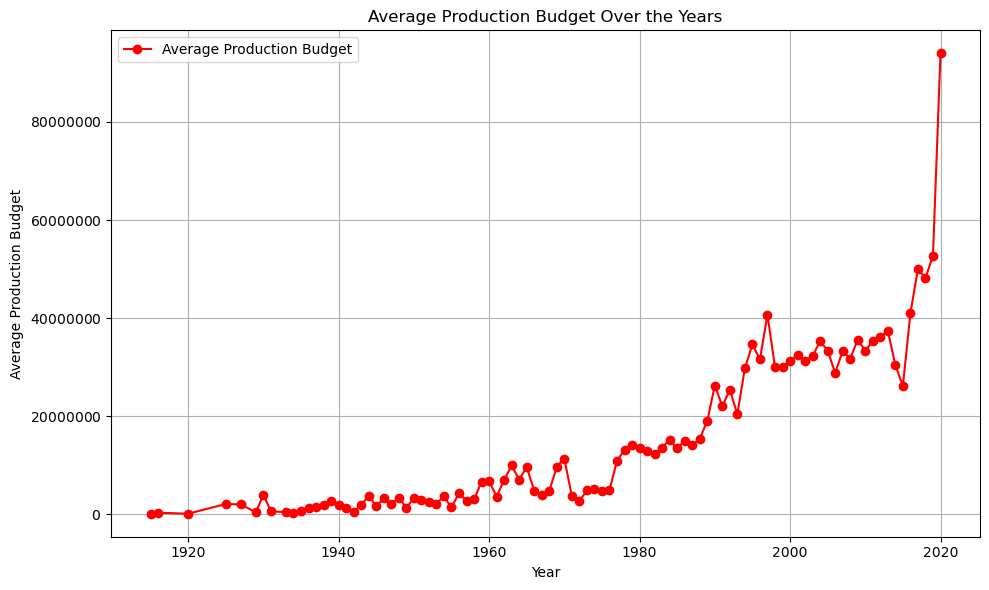

In [29]:
# Import ticker for data marking
import matplotlib.ticker as ticker
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(avg_budget_by_year['year'], avg_budget_by_year['production_budget'], label='Average Production Budget', marker='o', color='red')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Average Production Budget')
plt.title('Average Production Budget Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### This graph answers the question of how much movie studios are willing to invest in films over time. By showing fluctuations in production budgets, we can see there has been a trend toward bigger budgets. 

### 5.2 Trends of Domestic and Worldwide ROI Over Time

In [30]:
#create a column for return on investment
the_numbers['domestic_roi'] = (the_numbers['domestic_gross'] - the_numbers['production_budget']) / the_numbers['production_budget']
the_numbers['worldwide_roi'] = (the_numbers['worldwide_gross'] - the_numbers['production_budget']) / the_numbers['production_budget']

In [31]:
the_numbers['year'] = the_numbers['release_date'].dt.year
roi_by_year = the_numbers.groupby('year', as_index=False)[['domestic_roi', 'worldwide_roi']].mean()

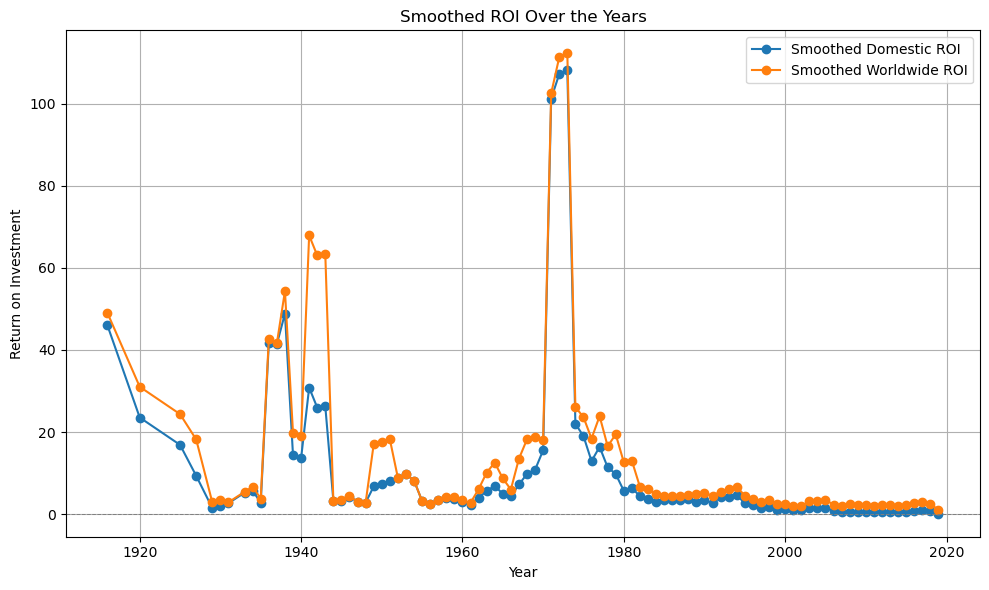

In [32]:
roi_by_year['domestic_roi_smooth'] = roi_by_year['domestic_roi'].rolling(window=3, center=True).mean()
roi_by_year['worldwide_roi_smooth'] = roi_by_year['worldwide_roi'].rolling(window=3, center=True).mean()

# Need to now plot smoothed curves
plt.figure(figsize=(10, 6))
plt.plot(roi_by_year['year'], roi_by_year['domestic_roi_smooth'], label='Smoothed Domestic ROI', marker='o')
plt.plot(roi_by_year['year'], roi_by_year['worldwide_roi_smooth'], label='Smoothed Worldwide ROI', marker='o')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.xlabel('Year')
plt.ylabel('Return on Investment')
plt.title('Smoothed ROI Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### The trend of domestic and worldwide ROI shows how effective movie investments were across different markets. A rising ROI is observed in the 1970s which may indicate that these periods were financially favorable for movie studios. The ROI both worldwide and in the domestic market have remained fairly at the same rate from th 1980s to the 2020s.

### 5.3 Top 10 Movie Studios by Total Gross Earnings

C:\Users\User\AppData\Local\Temp\ipykernel_5068\3763113325.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=studio_gross_df, x='total_gross', y='studio', palette='magma')


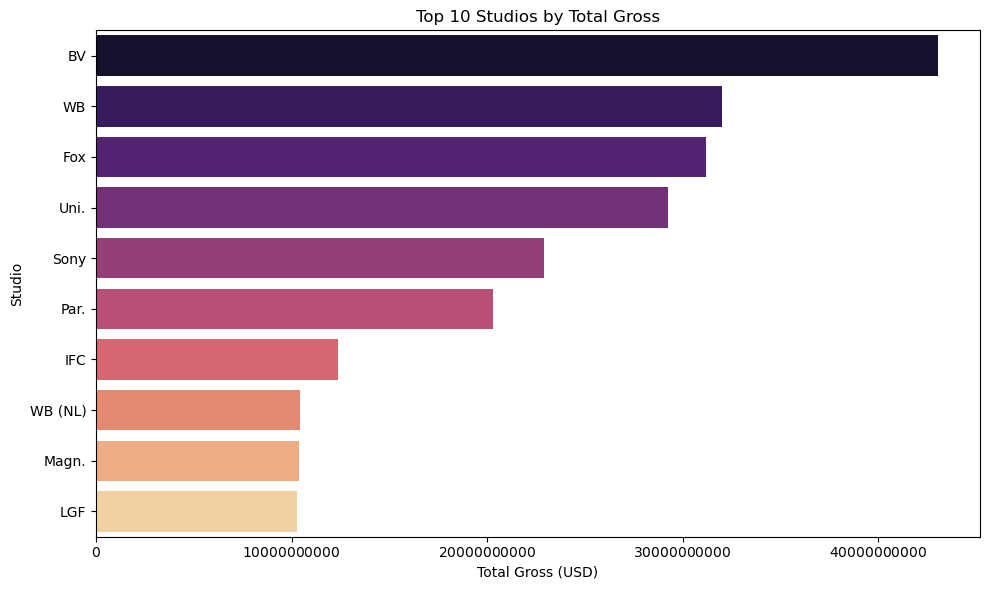

In [33]:
studio_gross = box_office.groupby('studio')['Total_gross'].sum().sort_values(ascending=False).head(10)

studio_gross_df = studio_gross.reset_index()
studio_gross_df.columns = ['studio', 'total_gross']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=studio_gross_df, x='total_gross', y='studio', palette='magma')

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')
plt.title("Top 10 Studios by Total Gross")
plt.xlabel("Total Gross (USD)")
plt.ylabel("Studio")
plt.tight_layout()
plt.show()

##### This graph highlight the movie studios that have consistently generated high revenues. The top studios are BV which stands for Buena Vista (now Disney Studios), WB is Warner Bros., Fox is 20th Century Fox (now part of Disney), Uni is Universal Pictures, and Sony is Sony Pictures Entertainment., given their large portfolios and global reach.

### 5.4 Top 20 Movie Genres by Number of Movies

In [34]:
# count genres in the list
genre_counts = IMDB['genres'].value_counts().sort_values(ascending=False).nlargest(20)
genre_counts.head()

genres
Drama           10189
Documentary      9149
Comedy           4604
Comedy,Drama     2451
Horror           2232
Name: count, dtype: int64

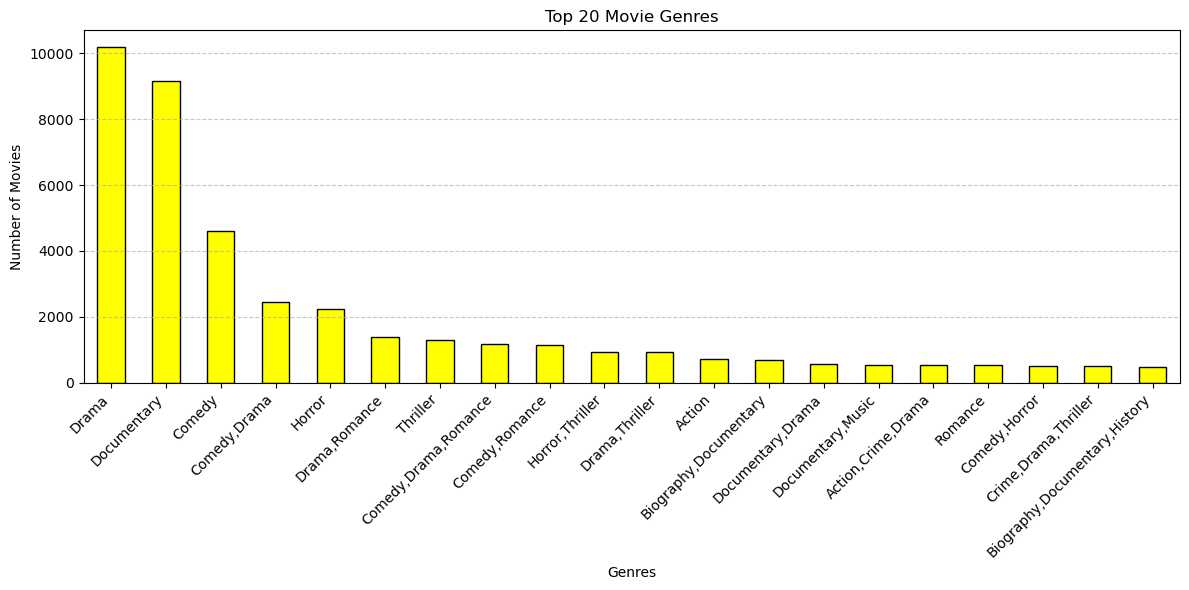

In [35]:
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='yellow', edgecolor='black')

plt.title('Top 20 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##### This graph highlights the prevalence of specific movie genres. Drama, documentary, and comedy lead with the most produced movies showing that they are consistently popular with audiences. Such information is crucial for producers and investors targeting the industry since they will know the genres that are likely to have more demand among the viewers. 

### 5.5 Distribution of Movie Profitability

In [36]:
the_numbers['gross_profit'] = the_numbers['worldwide_gross'] - the_numbers['production_budget']

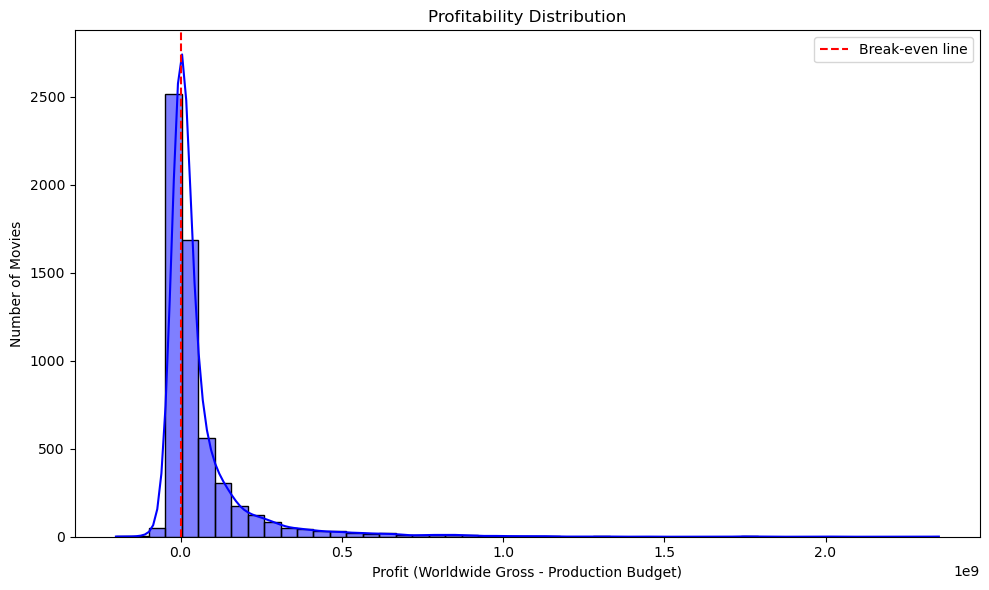

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(the_numbers['gross_profit'], bins=50, kde=True, color='blue')
plt.title('Profitability Distribution')
plt.xlabel('Profit (Worldwide Gross - Production Budget)')
plt.ylabel('Number of Movies')
plt.axvline(x=0, color='red', linestyle='--', label='Break-even line')
plt.legend()
plt.tight_layout()
plt.show()

The graph is right-skewed, indicating that most movies either make small profits. The data is concentrated around the 0.0 profit point. The long tail on the right suggests that a small number of films make huge profits while most of the others make normal profits. These few movies making abnormal profits are outliers in the industry. There are quite a huge number of movies that make negative profits which shows the industry is quite risky. 

## RECOMMENDATIONS
1. Movie Studios: It is recommended that studios carefully analyze production budgets in relation to projected returns, especially given the high risk associated with movie production. A more data-driven approach should be employed, factoring in historical trends, global market performance, and genre preferences when allocating funds for new projects.

2. Genre Focus: Studios should focus on genres that have consistently shown strong audience engagement and profitability. While popular genres like action and drama dominate, exploring niche markets with emerging trends, such as specific sub-genres or regional preferences may offer untapped opportunities for higher ROI.

3. Global Market Strategies: Studios must consider the international market’s impact on profitability. With the increasing globalization of cinema, tailored marketing and distribution strategies for international markets could help boost the performance of movies, particularly in regions with high box office potential.

4. Balancing Risk: Given the trend of many movies being financially unsuccessful, it is recommended that studios diversify their portfolios by producing both high-budget blockbuster films and lower-budget, high-concept films to mitigate risks and increase chances of profitability.

## CONCLUSION
The analysis reveals that the movie industry remains a high-risk sector, with production budgets rising steadily, yet many movies fail to achieve substantial profits. While a small number of blockbuster films achieve extraordinary financial success, the majority of films either break even or suffer losses. To thrive in such a volatile environment, studios must adopt a strategic approach by carefully evaluating production budgets, focusing on successful genres, and considering the global market's influence on profitability. Diversifying both the scale of investments and the range of genres produced will help mitigate risks and improve long-term profitability.

In [71]:
IMDB.to_excel('IMDB_clean.xlsx', index=False)
the_numbers.to_excel('the_numbers_1.xlsx', index=False)
box_office.to_excel('box_office_1.xlsx', index=False)